# Working in SymPy

`SymPy` is a package for symbolic manipulation of expressions, equations, and calculus. The [website](https://docs.sympy.org/latest/index.html) for `SymPy` has tutorials explaining how things work. You can also use the `help()` and `dir()` functions to explore the properties of the `SymPy` package.

The way it is structured is that the different mathematical objects are defined with capital letters (e.g. `Symbol`, `Function`, `Matrix`) while the functions and utilities are defined with lower-case leading letters (e.g. `simplify`, `dsolve`).

### 1. **Basic Operations**

- `symbols()`: Define symbolic variables for expressions.
- `subs()`: Substitute values or expressions for variables.
- `sympify()`: Convert strings or Python objects to SymPy expressions.
- `evalf()`: Evaluate expressions to floating-point numbers.
- `lambdify()`: Convert symbolic expressions to numerical functions (supports backends like NumPy and SciPy).


### 2. **Simplifying Expressions**

- `simplify()`: Simplify general expressions (algebraic, trigonometric, etc.).
- `expand()`: Expand an expression (e.g., expand a polynomial or product).
- `factor()`: Factor expressions (e.g., factor a polynomial).
- `collect()`: Collect like terms in an expression.
- `apart()`: Partial fraction decomposition of rational expressions.
- `cancel()`: Cancel common factors in a rational function.
- `trigsimp()`: Simplify trigonometric expressions.
- `logcombine()`: Combine logarithmic terms into a single expression.
- `powsimp()`: Simplify powers and exponents.


### 3. **Calculus**

#### 3.1 Derivatives
- `diff()`: Compute derivatives of expressions (supports higher-order derivatives).

#### 3.2 Integrals
- `integrate()`: Compute symbolic integrals (both definite and indefinite).
- `integrate(f, (var, a, b))`: Compute definite integrals over an interval.
  
#### 3.3 Limits
- `limit()`: Compute the limit of an expression as a variable approaches a value.

#### 3.4 Series
- `series()`: Expand a function in a Taylor or Laurent series around a point.


### 4. **Linear Algebra**

- `Matrix()`: Define symbolic matrices.
- `det()`: Compute the determinant of a matrix.
- `inv()`: Compute the inverse of a matrix.
- `eigenvals()`: Compute eigenvalues of a matrix.
- `eigenvects()`: Compute eigenvectors of a matrix.
- `solve_linear_system()`: Solve a system of linear equations.
- `transpose()`: Transpose a matrix.
- `rref()`: Compute the reduced row echelon form of a matrix.


### 5. **Differential Equations**

- `dsolve()`: Solve ordinary differential equations (ODEs).
- `Function()`: Define a function that represents the solution of a differential equation.
- `Eq()`: Set up an equation (useful for defining differential equations).
- `classify_ode()`: Classify an ODE to determine its solution method.
- `checkodesol()`: Check whether a solution satisfies a given differential equation.


### 6. **Solving Equations**

- `solve()`: Solve algebraic equations (returns roots or solutions).
- `nonlinsolve()`: Solve systems of nonlinear equations.
- `linsolve()`: Solve systems of linear equations.
- `solvers.solvers.solve()`: A more general solver for symbolic equations.
- `solvers.decomp_ineq()`: Decompose inequalities for solving them.


### 7. **Polynomials**

- `Poly()`: Create a polynomial object for more control over polynomials.
- `degree()`: Get the degree of a polynomial.
- `roots()`: Find the roots of a polynomial.
- `gcd()`: Compute the greatest common divisor of polynomials.
- `lcm()`: Compute the least common multiple of polynomials.


### 8. **Trigonometry**

- `sin()`, `cos()`, `tan()`: Basic trigonometric functions.
- `asin()`, `acos()`, `atan()`: Inverse trigonometric functions.
- `expand_trig()`: Expand trigonometric expressions (e.g., using angle addition formulas).
- `trigsimp()`: Simplify trigonometric expressions.
- `rewrite()`: Rewrite trigonometric functions in terms of other functions (e.g., rewrite `sin(x)` in terms of exponential functions).


### Here's an example of how to solve a quadratic equation

In [1]:
import sympy as sp

# Define the symbolic variables
a, b, c, x = sp.symbols('a b c x')

# Define the quadratic equation: ax^2 + bx + c = 0
quadratic_eq = sp.Eq(a*x**2 + b*x + c, 0)

# Solve the quadratic equation for x
solutions = sp.solve(quadratic_eq, x)

# Display the solutions
solutions


[(-b - sqrt(-4*a*c + b**2))/(2*a), (-b + sqrt(-4*a*c + b**2))/(2*a)]

### Here's an example of how to solve a differential equation

In [4]:
import sympy as sp

# Define the symbolic variables and function
x, x0, y0, a, b = sp.symbols('x x0 y0 a b')  # Independent variable, constants, initial condition
y = sp.Function('y')(x)  # Dependent variable y as a function of x

# Define the first-order differential equation: a*y' + b*y = 0
diff_eq = sp.Eq(a * y.diff(x) + b * y, 0)

# Solve the differential equation
general_solution = sp.dsolve(diff_eq, y)

# Extract the solution for y(x)
solution_y = general_solution.rhs

# Apply the initial condition: y(x0) = y0
initial_condition = sp.Eq(solution_y.subs(x, x0), y0)

# Solve for the constant C1
C1_value = sp.solve(initial_condition, sp.symbols('C1'))[0]

# Substitute C1 back into the general solution
solution_with_ic = general_solution.subs(sp.symbols('C1'), C1_value)

# Display the solution with initial conditions
solution_with_ic


Eq(y(x), y0*exp(-b*x/a)*exp(b*x0/a))

## Assignment (1): Use `SymPy` to test the solutions we derived in class last week. 

$Q_{tr} = A cos(\omega_\gamma t) + B sin(\omega_\gamma t)$

and 

$Q_{st} = \bar{C} cos(\omega t - \phi)$

where

$\omega_\gamma = \omega_0^2 - \gamma^2$,

$\bar{C} = \frac{F_0/m}{\sqrt{(\omega_0^2-\omega^2)^2-4\gamma^2\omega^2}}$,

and

$\phi = \frac{2\gamma\omega}{\omega_0^2-\omega^2}$

In [1]:
import sympy as sp
#define function
#first: variables
A, B, t, omega, omega_0, gamma, F_0, m = sp.symbols("A B t omega omega_0 gamma F_0 m")

Q_tr = sp.Function('Q_tr')(t)
Q_st = sp.Function('Q_st')(t)

#probably define complex variables first
omega_gamma = (omega_0**2 - gamma**2)
C = ( (F_0/m) / ((omega_0**2 - omega**2)**2 - 4*gamma**2*omega**2) )
phi = ( (2*gamma*omega) / (omega_0**2 - omega**2) )

Q_tr_eq = sp.Eq(A*sp.cos(omega_gamma * t)+B*sp.sin(omega_gamma*t), Q_tr)
Q_st_eq = sp.Eq(C*sp.cos(omega*t - phi), Q_st)

Qtr_solution = sp.dsolve(Q_tr_eq, Q_tr)
Qst_solution = sp.dsolve(Q_st_eq, Q_st)

display(Qtr_solution)
print("\n")
display(Qst_solution)


Eq(Q_tr(t), A*cos(t*(gamma**2 - omega_0**2)) - B*sin(t*(gamma**2 - omega_0**2)))

Eq(Q_st(t), -F_0*cos(omega*(2*gamma + t*(omega**2 - omega_0**2))/(omega**2 - omega_0**2))/(m*(4*gamma**2*omega**2 - (omega**2 - omega_0**2)**2)))

## Assignment (2): Create representative plots of $\bar{C}$ and $\phi$ 


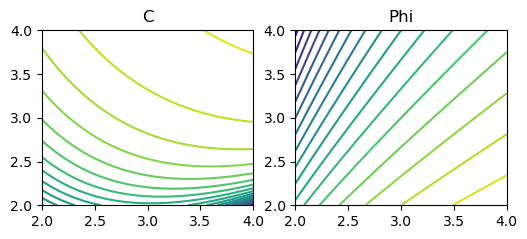

interactive(children=(FloatSlider(value=1.0, description='$F_0$', max=3.99, min=1.0, step=0.01), FloatSlider(v…

<function __main__.bigplot(F_0=1, m=1, omega_0=1)>

In [11]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider, IntSlider

#the variables
def bigplot(F_0=1, m=1, omega_0=1):

    omega = np.linspace(2, 4, 150)
    gamma = np.linspace(2, 4, 150)
    Omega, Gamma = np.meshgrid(omega, gamma)


#the eqs. issue: which variable should i use as x? how do i plot multivariable functions?
    
    Cfunc = (F_0/m) / ((omega_0**2 - Omega**2)**2 - 4*Gamma**2 * Omega**2)
    Phifunc = (2*Gamma*Omega) / (omega_0**2 - Omega**2)
    
    plt.figure(figsize=(6, 5))
    
    plt.subplot(2, 2, 1)
    plot_C = plt.contour(Omega, Gamma, Cfunc, levels=20, cmap="viridis")
    plt.title("C")

    plt.subplot(2, 2, 2)
    plot_Phi = plt.contour(Omega, Gamma, Phifunc, levels=20, cmap="viridis")
    plt.title("Phi")
    
    
    plt.show()

bigplot()

interact(bigplot,
         F_0 = FloatSlider(min=1, max=3.99, step=0.01, value=1, description="$F_0$"),
         m = FloatSlider(min=1, max=3.99, step=0.01, value=1, description="m"),
         omega_0 = FloatSlider(min=1, max=3.99, step=0.01, value=1, description="$\omega_0$") #doesnt throw me divide by 0 error between these values?
        )

#im not convinced i did this right but i did my best

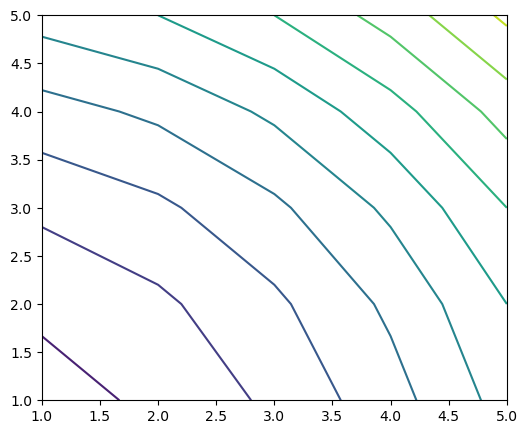

In [38]:
x = np.linspace(1, 5, 5)
y = np.linspace(1, 5 ,5)
X, Y = np.meshgrid(x, y)

m = 1

def Z(X, Y):
    return X**2 + Y**2 + m

plt.figure(figsize=(6, 5))
plot = plt.contour(X, Y, Z(X, Y), levels=10, cmap="viridis")
plt.show()
